In [17]:
import matplotlib.pyplot as plt
import scipy.io as sio

In [18]:
mat = sio.loadmat('capacity_test.mat')

In [19]:
print(sorted(mat.keys()))

['__globals__', '__header__', '__version__', 'cap', 'col_cell_label', 'curr', 'row_diag_number', 'time', 'vcell']


In [20]:
# this is all the battery labels i.e. each label is a sepearte lgm50 battery
mat['col_cell_label']

array([[array(['W3'], dtype='<U2'), array(['W4'], dtype='<U2'),
        array(['W5'], dtype='<U2'), array(['W7'], dtype='<U2'),
        array(['W8'], dtype='<U2'), array(['W9'], dtype='<U2'),
        array(['W10'], dtype='<U3'), array(['G1'], dtype='<U2'),
        array(['V4'], dtype='<U2'), array(['V5'], dtype='<U2')]],
      dtype=object)

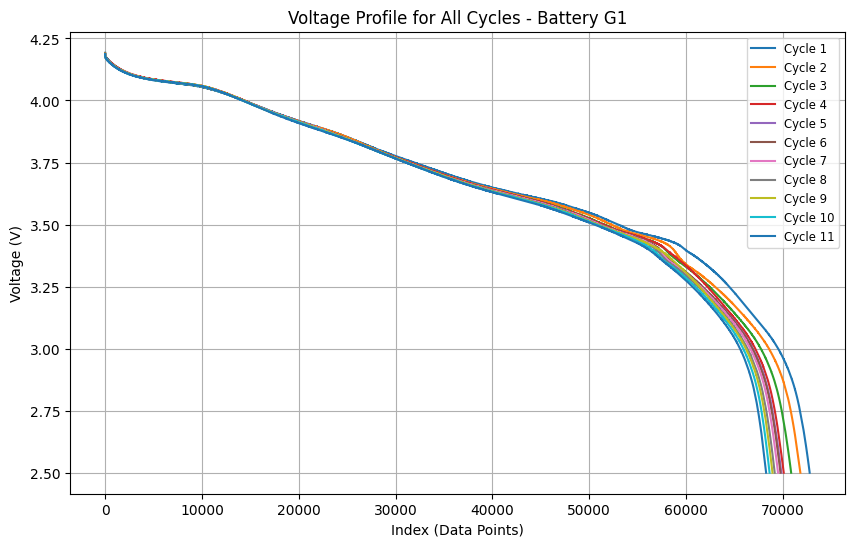

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio  

mat = sio.loadmat('capacity_test.mat')

battery_label = 'G1'
col_index = np.where([label[0] == battery_label for label in mat['col_cell_label'][0]])[0][0]

# Iterate over all rows of vcell for the specified column index
vcell_all_cycles = mat['vcell'][:, col_index]  

plt.figure(figsize=(10, 6))
for i, vcell_cycle in enumerate(vcell_all_cycles):
    if vcell_cycle.size > 1 and not np.isnan(vcell_cycle).all():  # Skip empty or NaN rows
        vcell = vcell_cycle[~np.isnan(vcell_cycle)].reshape(-1)  # Remove NaN and flatten
        plt.plot(vcell, label=f"Cycle {i+1}")

# Plot formatting
plt.xlabel("Index (Data Points)")
plt.ylabel("Voltage (V)")
plt.title(f"Voltage Profile for All Cycles - Battery {battery_label}")
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.show()


In [22]:
mat['col_cell_label']

array([[array(['W3'], dtype='<U2'), array(['W4'], dtype='<U2'),
        array(['W5'], dtype='<U2'), array(['W7'], dtype='<U2'),
        array(['W8'], dtype='<U2'), array(['W9'], dtype='<U2'),
        array(['W10'], dtype='<U3'), array(['G1'], dtype='<U2'),
        array(['V4'], dtype='<U2'), array(['V5'], dtype='<U2')]],
      dtype=object)

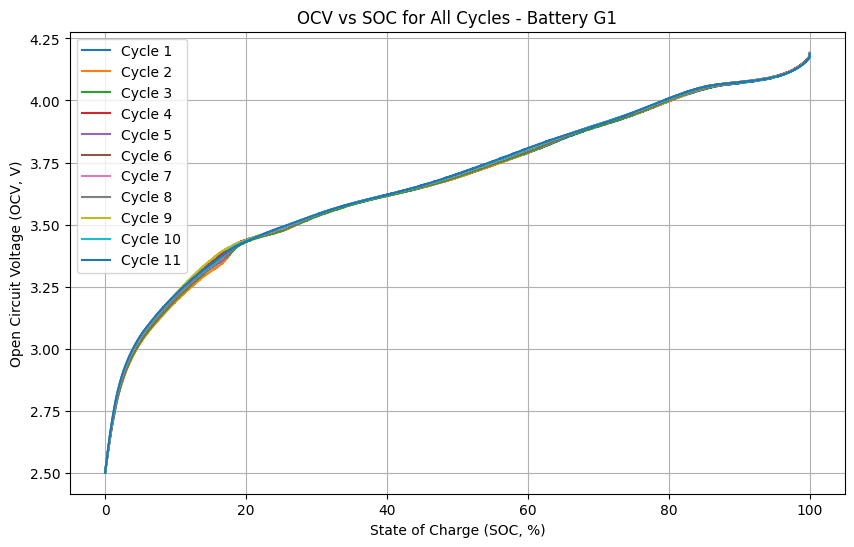

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio  

# Load the data
mat = sio.loadmat('capacity_test.mat')

# Select the data for the specific battery cell
battery_label = 'G1'

col_index = np.where([label[0] == battery_label for label in mat['col_cell_label'][0]])[0][0]
vcell = mat['vcell'][:, col_index]
current = mat['curr'][:, col_index]
cap = mat['cap'][:, col_index]

Q_end = []
SOC = []
OCV = []

# Check if the number of cycles in `cap` and `vcell` match
num_cycles = min(len(cap), len(vcell)) 

# Loop over the cycles and extract the OCV-SOC relationship
for i in range(num_cycles):
    capacity = cap[i]
    
    if capacity.size > 1 and not np.isnan(capacity).all():  # Skip empty or NaN rows
        cap_cycle = capacity[~np.isnan(capacity)].reshape(-1)  # Remove NaN and flatten

        # Calculate SOC
        Q_end = cap_cycle[-1]
        # (current_capacity / capacity_end_of_cycle) * 100
        soc_cycle = (cap_cycle / Q_end) * 100  # SOC from 0% to 100% based on last capacity in the cycle
        # SoC from 100% to 0%
        soc_cycle = 100 - soc_cycle.flatten() # Invert SOC for data orientation
        
        SOC.append(soc_cycle)
        
        # Extract corresponding OCV for the current cycle
        vcell_cycle = vcell[i].flatten()  # Access the i-th voltage cycle from vcell and flatten to be used in data fitting
        OCV.append(vcell_cycle)

# Plot OCV vs SOC for each cycle
plt.figure(figsize=(10, 6))
for i in range(len(SOC)):
    plt.plot(SOC[i], OCV[i], label=f"Cycle {i+1}")

plt.xlabel("State of Charge (SOC, %)")
plt.ylabel("Open Circuit Voltage (OCV, V)")
plt.title(f"OCV vs SOC for All Cycles - Battery {battery_label}")
plt.legend()
plt.grid(True)
plt.show()

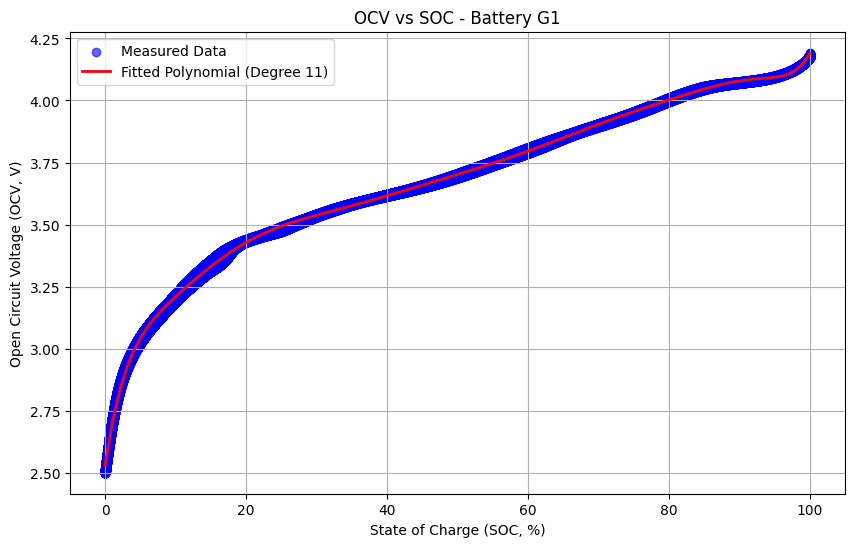

In [11]:
SOC_flat = np.concatenate(SOC)
OCV_flat = np.concatenate(OCV)

# Fit polynomial 
# learn polynmial functions fitting
degree = 11
coeffs = np.polyfit(SOC_flat, OCV_flat, degree)
# Create a polynomial function
poly_fit = np.poly1d(coeffs)    

# Generate smooth SOC values for plotting the fit curve
SOC_smooth = np.linspace(min(SOC_flat), max(SOC_flat), 100)
OCV_smooth = poly_fit(SOC_smooth)

# Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(SOC_flat, OCV_flat, label="Measured Data", color='blue', alpha=0.6)
plt.plot(SOC_smooth, OCV_smooth, label=f"Fitted Polynomial (Degree {degree})", color='red', linewidth=2)
plt.xlabel("State of Charge (SOC, %)")
plt.ylabel("Open Circuit Voltage (OCV, V)")
plt.title(f"OCV vs SOC - Battery {battery_label}")
plt.legend()
plt.grid(True)
plt.show()

 SOC      OCV
0.00 2.530047
0.01 2.532000
0.02 2.533946
0.03 2.535887
0.04 2.537823
0.05 2.539752
0.06 2.541676
0.07 2.543593
0.08 2.545506
0.09 2.547412
0.10 2.549313
0.11 2.551208
0.12 2.553097
0.13 2.554981
0.14 2.556859
0.15 2.558731
0.16 2.560598
0.17 2.562460
0.18 2.564315
0.19 2.566165
0.20 2.568010
0.21 2.569849
0.22 2.571683
0.23 2.573511
0.24 2.575333
0.25 2.577151
0.26 2.578962
0.27 2.580769
0.28 2.582570
0.29 2.584365
0.30 2.586155
0.31 2.587940
0.32 2.589719
0.33 2.591494
0.34 2.593262
0.35 2.595026
0.36 2.596784
0.37 2.598537
0.38 2.600285
0.39 2.602027
0.40 2.603764
0.41 2.605497
0.42 2.607223
0.43 2.608945
0.44 2.610662
0.45 2.612373
0.46 2.614079
0.47 2.615780
0.48 2.617476
0.49 2.619167
0.50 2.620853
0.51 2.622534
0.52 2.624210
0.53 2.625881
0.54 2.627547
0.55 2.629207
0.56 2.630863
0.57 2.632514
0.58 2.634160
0.59 2.635801
0.60 2.637437
0.61 2.639068
0.62 2.640694
0.63 2.642316
0.64 2.643932
0.65 2.645544
0.66 2.647151
0.67 2.648753
0.68 2.650350
0.69 2.651942
0.70 2

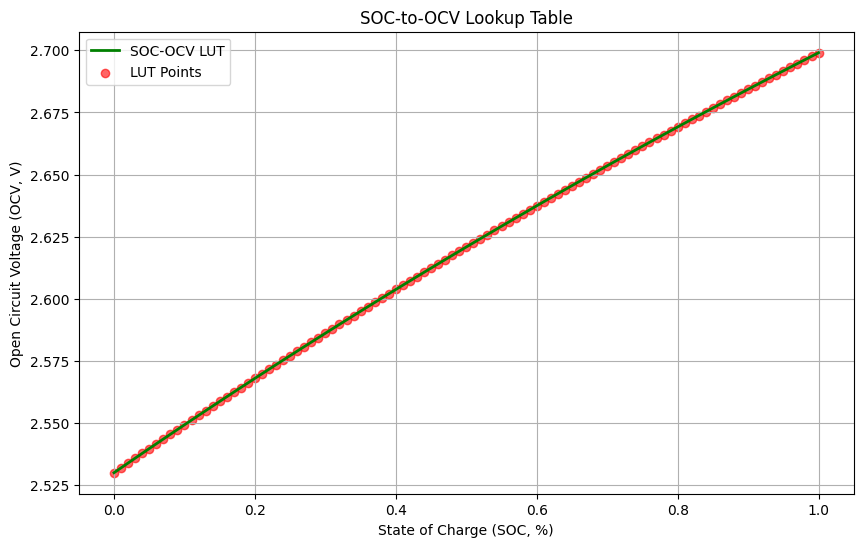

In [12]:
import os
import pandas as pd 

# Define the SOC range for the LUT
SOC_LUT = np.linspace(0, 1, 101) 
OCV_LUT = poly_fit(SOC_LUT)  # Compute OCV for each SOC level using the fitted polynomial

# Combine SOC and OCV into a LUT
lut = np.column_stack((SOC_LUT, OCV_LUT))  # Combine SOC and OCV values

# Optionally, convert to a Pandas DataFrame for better visualization
lut_df = pd.DataFrame(lut, columns=["SOC", "OCV"])

# Print the lookup table
print(lut_df.to_string(index=False))

output_folder = "soc_ocv"
output_file = os.path.join(output_folder, f"{battery_label}_soc_to_ocv.csv")
lut_df.to_csv(output_file, index=False)

# Plot the LUT for visualization
plt.figure(figsize=(10, 6))
plt.plot(SOC_LUT, OCV_LUT, label="SOC-OCV LUT", color='green', linewidth=2)
plt.scatter(SOC_LUT, OCV_LUT, color='red', alpha=0.6, label="LUT Points")
plt.xlabel("State of Charge (SOC, %)")
plt.ylabel("Open Circuit Voltage (OCV, V)")
plt.title("SOC-to-OCV Lookup Table")
plt.legend()
plt.grid(True)
plt.show()